<a href="https://colab.research.google.com/github/qiao-hao-git/ML_Code/blob/main/Deep_Learning_with_Python_TensorFlow_and_Keras/Deep_Learning_with_Python_TensorFlow_and_Keras2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Deep_Learning_with_Python_TensorFlow_and_Keras')

Mounted at /content/drive


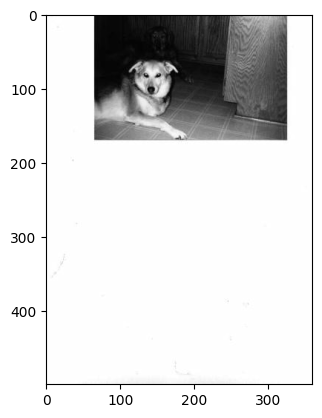

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "/content/drive/MyDrive/Colab Notebooks/Deep_Learning_with_Python_TensorFlow_and_Keras/PetImages"
CATEGORIES = ["Dog","Cat"]

for category in CATEGORIES:
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap="gray")
    plt.show()
    break
  break

In [4]:
print(img_array.shape)

(500, 360)


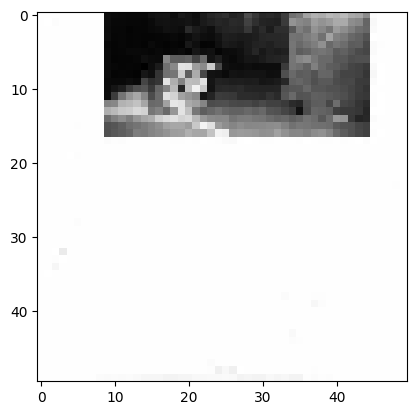

In [5]:
IMG_SIZE = 50

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [6]:
training_data = []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_training_data()

In [9]:
print(len(training_data))

24913


In [10]:
import random

random.shuffle(training_data)

In [11]:
for sample in training_data[:10]:
  print(sample[1])

1
0
1
0
0
0
0
1
1
0


In [12]:
X = []
y = []

In [13]:
for features,label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [14]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [15]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
print(X[1])

[[[123]
  [125]
  [125]
  ...
  [ 87]
  [185]
  [107]]

 [[127]
  [128]
  [129]
  ...
  [ 61]
  [147]
  [202]]

 [[128]
  [130]
  [131]
  ...
  [ 82]
  [198]
  [170]]

 ...

 [[ 50]
  [ 43]
  [ 47]
  ...
  [ 30]
  [ 69]
  [ 74]]

 [[ 40]
  [ 48]
  [ 51]
  ...
  [ 61]
  [ 67]
  [ 74]]

 [[ 49]
  [ 54]
  [ 59]
  ...
  [ 70]
  [ 67]
  [ 76]]]


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Conv2D,MaxPooling2D,Flatten
import pickle

X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

X = X/255.0
X = np.array(X)
y = np.array(y)

In [26]:
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X,y,batch_size=32,epochs=10,validation_split=0.3)

Epoch 1/10
545/545 [==============================] - 123s 222ms/step - loss: 0.6181 - accuracy: 0.6570 - val_loss: 0.5816 - val_accuracy: 0.7058
Epoch 2/10
545/545 [==============================] - 128s 235ms/step - loss: 0.5237 - accuracy: 0.7425 - val_loss: 0.5036 - val_accuracy: 0.7600
Epoch 3/10
545/545 [==============================] - 128s 234ms/step - loss: 0.4802 - accuracy: 0.7729 - val_loss: 0.4718 - val_accuracy: 0.7790
Epoch 4/10
545/545 [==============================] - 118s 217ms/step - loss: 0.4462 - accuracy: 0.7935 - val_loss: 0.4871 - val_accuracy: 0.7667
Epoch 5/10
545/545 [==============================] - 121s 221ms/step - loss: 0.4183 - accuracy: 0.8075 - val_loss: 0.5040 - val_accuracy: 0.7685
Epoch 6/10
545/545 [==============================] - 128s 235ms/step - loss: 0.3932 - accuracy: 0.8206 - val_loss: 0.5091 - val_accuracy: 0.7703
Epoch 7/10
545/545 [==============================] - 121s 222ms/step - loss: 0.3623 - accuracy: 0.8396 - val_loss: 0.4865 -